# Overall data analysis

In [39]:
import os
import subprocess
from matplotlib import pyplot
import pandas as pd
import numpy as np
%matplotlib inline

os.chdir("C:/Users/Admin/Downloads")
os.remove("./data.csv")
subprocess.run("wget -O data.csv https://usu.box.com/shared/static/vsdqjmmjxvblp20whau3rrkq5cdqn9a1", shell=True)
data = pd.read_csv("./data.csv",delimiter=",", header=0, engine='python')

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

def integral(data, step=1):
    toReturn = []
    for i in range(0, len(data) - 1):
        toReturn.append(float(data[i] - data[i + 1])/step)
    return toReturn

def removeNights(time, data, dataStart):
    cleanedData = []
    night = [23, 0, 1, 2, 3, 4]
    for i in range(dataStart, len(time)):
        if int(time[i][11:13]) in night:
            cleanedData.append(0)
        else:
            cleanedData.append(data[i])
    return cleanedData

startOfData = 187
len(data[startOfData:len(data)])

47

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour')

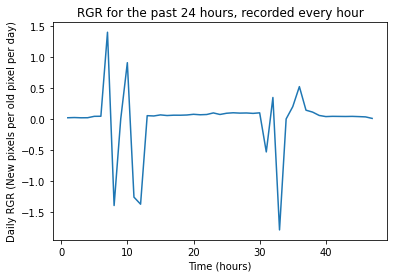

In [40]:
pyplot.plot(countingSequence(len(data[startOfData:len(data)])), data['Daily RGR'][startOfData:len(data)])
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 3-point rolling average')

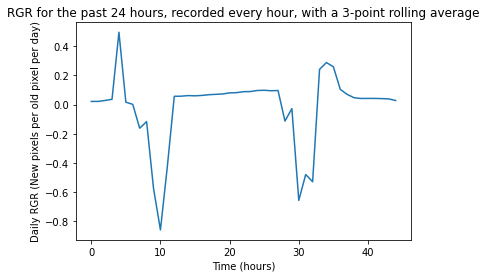

In [41]:
rollingDaily = rollingAverage(3, data['Daily RGR'][startOfData:len(data)])
pyplot.plot(rollingDaily)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 3-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour, with a 6-point rolling average')

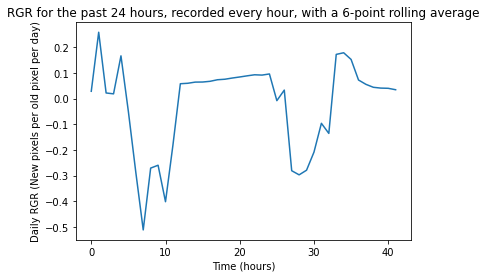

In [42]:
rolling3Hourly = rollingAverage(6, data['Daily RGR'][startOfData:len(data)])
pyplot.plot(rolling3Hourly)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour, with a 6-point rolling average")

Text(0.5, 1.0, 'RGR for the past 24 hours, recorded every hour and averaged every 24 hours')

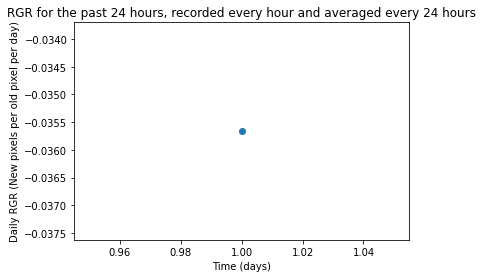

In [43]:
daily = dailyAverage(data['Daily RGR'][startOfData:len(data)])
sequence = countingSequence(len(daily))
pyplot.scatter(sequence, daily)
pyplot.xlabel("Time (days)")
pyplot.ylabel("Daily RGR (New pixels per old pixel per day)")
pyplot.title("RGR for the past 24 hours, recorded every hour and averaged every 24 hours")

Text(0.5, 1.0, 'Daily RGR from the last 24 hours')

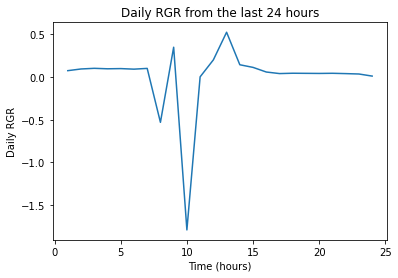

In [44]:
last24 = data["Daily RGR"][-24:len(data)]
sequence = countingSequence(len(last24))
pyplot.plot(sequence, last24)
pyplot.xlabel("Time (hours)")
pyplot.ylabel("Daily RGR")
pyplot.title("Daily RGR from the last 24 hours")

In [45]:
# integrated = rollingAverage(24, integral(data['Daily RGR'][startOfData:len(data)]))
# sequence = countingSequence(len(integrated))
# pyplot.plot(sequence, integrated)
# pyplot.xlabel("Time (hours)")
# pyplot.ylabel("Data integral (slope between points, smoothed)")
# pyplot.title("Integral (smoothed)")

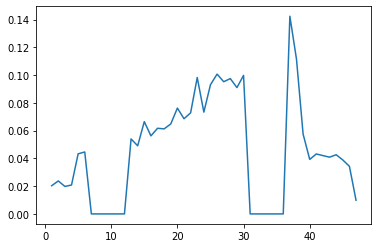

In [46]:
cleanedData = removeNights(data['Timestamp'], data['Daily RGR'], startOfData)
sequence = countingSequence(len(cleanedData))
pyplot.plot(sequence, cleanedData)